In this file I´m going to skim through the dataframe.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
#Import the data frame
attack = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

In [3]:
attack.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# First overwiew

In [4]:
print ("attacks: number of data",attack.size)

attacks: number of data 617352


In [5]:
print("The df has ", attack.shape[1], "columns and ", attack.shape[0], "rows.")

The df has  24 columns and  25723 rows.


In [6]:
print("Column names: ", attack.columns)


Column names:  Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


## Columns overview

In [7]:
#Number of nulls of each column
attack.isnull().sum().sort_values(ascending=False)

Unnamed: 22               25722
Unnamed: 23               25721
Time                      22775
Species                   22259
Age                       22252
Sex                       19986
Activity                  19965
Location                  19961
Fatal (Y/N)               19960
Area                      19876
Name                      19631
Country                   19471
Injury                    19449
Investigator or Source    19438
Type                      19425
Year                      19423
href formula              19422
Date                      19421
pdf                       19421
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Case Number               17021
dtype: int64

In [8]:
#Percentage of nulls of each column
perc_null = attack.isnull().sum().apply(lambda x: x/attack.shape[0]).sort_values(ascending=False)
perc_null

Unnamed: 22               0.999961
Unnamed: 23               0.999922
Time                      0.885394
Species                   0.865335
Age                       0.865062
Sex                       0.776970
Activity                  0.776154
Location                  0.775998
Fatal (Y/N)               0.775959
Area                      0.772694
Name                      0.763169
Country                   0.756949
Injury                    0.756094
Investigator or Source    0.755666
Type                      0.755161
Year                      0.755083
href formula              0.755044
Date                      0.755005
pdf                       0.755005
href                      0.755005
Case Number.1             0.755005
Case Number.2             0.755005
original order            0.754733
Case Number               0.661704
dtype: float64

In [9]:
perc_null[perc_null > .9].index

Index(['Unnamed: 22', 'Unnamed: 23'], dtype='object')

If a column is almost completely empty (like unnamed:22 and unnamed: 23) they are useless.
Specially if we neither have information about the kind of content it was suposed to store
(they don't even have a column name), so i'll drop them out.

In [10]:
attack.drop('Unnamed: 22', inplace=True, axis=1)

In [11]:
attack.drop('Unnamed: 23', inplace=True, axis=1)

In [12]:
attack.head(n=3)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0


## Looking for duplicated columns:

In [13]:
def getDuplicateColumns(df): 
  
    # Create an empty set 
    duplicateColumnNames = set() 
      
    # Iterate through all the columns  
    # of dataframe 
    for x in range(df.shape[1]): 
          
        # Take column at xth index. 
        col = df.iloc[:, x] 
          
        # Iterate through all the columns in 
        # DataFrame from (x + 1)th index to 
        # last index 
        for y in range(x + 1, df.shape[1]): 
              
            # Take column at yth index. 
            otherCol = df.iloc[:, y] 
              
            # Check if two columns at x & y 
            # index are equal or not, 
            # if equal then adding  
            # to the set 
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y]) 
                  
    # Return list of unique column names  
    # whose contents are duplicates. 
    return list(duplicateColumnNames)

In [14]:
getDuplicateColumns(attack)

[]

In [15]:
#For the whole dataset there is no column that is exactly equal in every value to another. 
# But if we use it in several samples of n-rows we realize that the columns "href", "Case Number.1" and "Case Number.2"
# are duplicated

# Removing duplicated columns

In [16]:
attack.drop('href', inplace=True, axis=1)
attack.drop('Case Number.1', inplace=True, axis=1)
attack.drop('Case Number.2', inplace=True, axis=1)


In [17]:
attack.head(n=2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0


## Rows overview

In [18]:
#row_nulls : empty rows
null_rows = attack.isnull().sum(axis=1).apply(lambda x: x/attack.shape[1]).sort_values(ascending=False)
null_rows[null_rows == 1]

12861    1.0
11352    1.0
11338    1.0
11339    1.0
11340    1.0
        ... 
20045    1.0
20044    1.0
20043    1.0
20042    1.0
17019    1.0
Length: 17020, dtype: float64

If a row is almost completely empty is useless.

## Removing empty rows

In [19]:
attack2 = attack.dropna(axis=0, how='all').copy()

In [20]:
attack2.shape

(8703, 19)

# Have a look at some columns

Now I´m going to explore the columns that I think that can give me interesting information from those that have less percentage of null values.

In [21]:
#COLUMN YEARS
"""attack2['Year'] = attack2['Year'].fillna(1)"""

"attack2['Year'] = attack2['Year'].fillna(1)"

In [22]:
print (attack2['Year'].unique())

[2018. 2017.   nan 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008.
 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996.
 1995. 1984. 1994. 1993. 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986.
 1985. 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973.
 1972. 1971. 1970. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960.
 1959. 1958. 1957. 1956. 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948.
 1848. 1947. 1946. 1945. 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937.
 1936. 1935. 1934. 1933. 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925.
 1924. 1923. 1922. 1921. 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913.
 1912. 1911. 1910. 1909. 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901.
 1900. 1899. 1898. 1897. 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889.
 1888. 1887. 1886. 1885. 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877.
 1876. 1875. 1874. 1873. 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865.
 1864. 1863. 1862. 1861. 1860. 1859. 1858. 1857. 18

### CLEANING COLUMN Fatal (Y/N)

In [23]:
print (attack2['Fatal (Y/N)'].unique())

['N' 'Y' nan 'M' 'UNKNOWN' '2017' ' N' 'N ' 'y']


In [24]:
# put every value into capital letters
attack2['Fatal (Y/N)'] = attack2['Fatal (Y/N)'].str.upper()
    

In [25]:
print (attack2['Fatal (Y/N)'].unique())

['N' 'Y' nan 'M' 'UNKNOWN' '2017' ' N' 'N ']


In [26]:
attack2['Fatal (Y/N)'].replace({' N': 'N', 'N ': 'N', '2017': 'UNKNOWN', 'M' : 'UNKNOWN', 'NaN' : 'UNKNOWN'}, inplace=True)

In [27]:
print (attack2['Fatal (Y/N)'].unique())

['N' 'Y' nan 'UNKNOWN']


In [28]:
# Fill nans
attack2['Fatal (Y/N)'] = attack2['Fatal (Y/N)'].fillna('UNKNOWN')

In [30]:
#at this point the column "Fatal (Y/N)" has only de values that I wanted:
print (attack2['Fatal (Y/N)'].unique())

['N' 'Y' 'UNKNOWN']


## Column: Type of attack

In [31]:
print ("Unique values: ", attack['Type'].unique())
print (len(attack['Type'].unique()))
print (attack['Type'].value_counts())

Unique values:  ['Boating' 'Unprovoked' 'Invalid' 'Provoked' 'Questionable' 'Sea Disaster'
 nan 'Boat' 'Boatomg']
9
Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Type'>

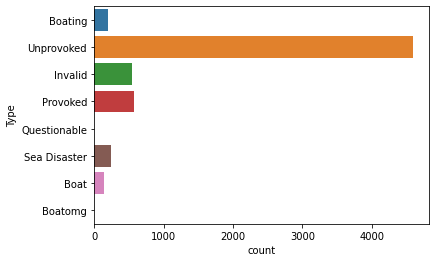

In [86]:
sns.countplot(y=attack2.Type)


## Column: Explanation of the injury

In [40]:
injury_type = attack2['Injury'].unique()
len (injury_type)

3738

In [41]:
injury_uniques_count = attack2['Injury'].value_counts()
print(injury_uniques_count)
print("__________________________________________________________________________")
print (injury_uniques_count[injury_uniques_count > 20])

FATAL                                                                                802
Survived                                                                              97
Foot bitten                                                                           87
No injury                                                                             82
Leg bitten                                                                            72
                                                                                    ... 
FATAL, left leg severed                                                                1
Thigh nipped, minor injury                                                             1
Smith hit by tail of shark, Walker sustained cuts on his  wrist PROVOKED INCIDENT      1
Severe lacerations to right hand                                                       1
Captive shark bit air hose & minor lacerations on diver's cheek PROVOKED INCIDENT      1
Name: Injury, Length:

This column has very interesting values but in my opinion it is needed to parametrize it better. It has too many different values to make an analysis at this point.
More over the value "survived" doesn´t give too much information since I supose that if the value is different from "FATAL" they have survived.

## Column: Area

In [42]:
area_uniques = attack2['Area'].unique()
len (area_uniques)

826

## Column: Activity

In [43]:
activity_uniques = attack2['Activity'].unique()
print(len (activity_uniques))

"""surf_activities = []
for i in attack['Activity']:
    if "surfing" in str(i):
       surf_activities.append(i)
print(len(surf_activities))
print( surf_activities)"""

1533


'surf_activities = []\nfor i in attack[\'Activity\']:\n    if "surfing" in str(i):\n       surf_activities.append(i)\nprint(len(surf_activities))\nprint( surf_activities)'

In [44]:
activity_counts = attack2.Activity.value_counts()
activity_counts.loc["Swimming"]

869

In [45]:

activity_counts.iloc[:10]

Surfing         971
Swimming        869
Fishing         431
Spearfishing    333
Bathing         162
Wading          149
Diving          127
Standing         99
Snorkeling       89
Scuba diving     76
Name: Activity, dtype: int64

In [84]:
attack2.to_csv(r'attacks_clean.csv', index = False)